In diesem Projekt wollen wir untersuchen warum (und vor allem mit welchem Faktor X) es sinniger ist, unsere ML-Model auf der GPU zu trainieren.
Wir nutzen hierbei den Vorteil einer [heterogenen Architektur](https://en.wikipedia.org/wiki/Heterogeneous_System_Architecture). In welcher die CPU nicht mehr wie gewohnt die Aufgaben ausfuehrt sondern als eine Art Scheduler die Aufgaben an unsere GPU weitergibt.  
  
Wir werden die CuML Library von RAPIDS.ai gegen scikit-learn antreten lassen.  
SciKit-Learn ist weithin bekannt als eine MachineLearning Libraries. SciKit-Learn benutzt zum trainieren des Models weiterhin wie bekannt die CPU mit ihren eigenen Registern und Speicher.  
CuML ist eine von RAPIDS.ai entwickelte Library die es ermoeglicht die von NVIDIA gebaute CUDA-Architektur zum Training des Models zu nutzen. Hierbei fungiert die CPU wie eingangs erwaehnt als Scheduler, sprich entsteht eine Aufgabe weist die CPU automatisch die Rechnung an die GPU zu und ermoeglicht von dort Allokation von Speicher, sowie Ressourcen. Dies wird moeglich durch die bisher einzigartige CUDA Architektur, auf welcher RAPIDS.ai CuML (sowie auch CuDF) aufbaut. Zum weiteren Verstaendnis hilft hier vielleicht folgender Link: [Offizielle RAPIDS Praesentation](https://developer.download.nvidia.com/video/gputechconf/gtc/2019/presentation/s9801-rapids-deep-dive-into-how-the-platform-works.pdf).  
CuDF ist (aehnlich wie CuML eine GPU nahe Adaption fuer ML-Algorithmen) eine GPU Utilisation vergleichbar mit der Pandas Library.  
  
Die hier gestellte Aufgabe ist recht simpel und dient lediglich einer einfachen Visualisierung der Geschwindigkeitsunterschiede. Um zu zeigen wie viel schneller die GPU Version eines ML-Algorithmus ist, benutzen wir hier einen RandomForest Classifier (einmal mit SciKit-Learn auf der CPU, einmal mit CuML auf der GPU) auf einem vorher erzeugten DataSet aus Zufallszahlen. Abschliessend wurde die Geschwindigkeit beider Algorithmen faktorisiert und in einem Plot dargestellt.  
  
Details zu meinem benutzten Setup finden sie in der ersten Code-Zelle.

In [3]:
#DETAILS ZU MEINEM SETUP FINDEN SIE HIER
!lsb_release -a
!nvcc --version
!nvidia-smi --query-gpu=name --format=csv,noheader

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.2 LTS
Release:	22.04
Codename:	jammy
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Thu_Nov_18_09:45:30_PST_2021
Cuda compilation tools, release 11.5, V11.5.119
Build cuda_11.5.r11.5/compiler.30672275_0
NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from cuml.ensemble import RandomForestClassifier as cuRFClassifier
from time import time

Scikit-learn Geschwindigkeit: 24.5433s
CuML Geschwindigkeit: 0.4489s
CuML Faktor ueber Scikit: 54.67x


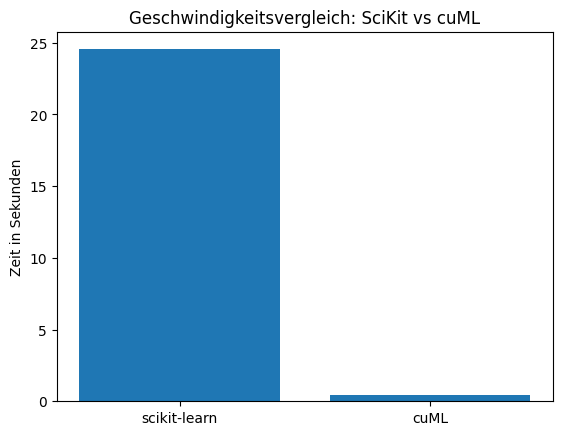

In [4]:
# Zufaellig generierte Daten
X = np.random.rand(10000, 1000)
y = np.random.randint(0, 2, 10000)

X = X.astype('float32')

# SciKit-Learn Algorithmus + timing (CPU)
clf_sk          = RandomForestClassifier(n_estimators=100)
start_time      = time()
clf_sk.fit(X, y)
sk_time         = time() - start_time

# CuML Algorithmus + timing (GPU)
clf_cuml        = cuRFClassifier(n_estimators=100)
start_time      = time()
clf_cuml.fit(X, y)
cuml_time       = time() - start_time


print("Scikit-learn Geschwindigkeit: {:.4f}s".format(sk_time))
print("CuML Geschwindigkeit: {:.4f}s".format(cuml_time))
print("CuML Faktor ueber Scikit: {:.2f}x".format(sk_time/cuml_time))

labels = ['scikit-learn', 'cuML']
values = [sk_time, cuml_time]
plt.bar(labels,values)
plt.ylabel('Zeit in Sekunden')
plt.title('Geschwindigkeitsvergleich: SciKit vs cuML')

plt.show()

LEGAL DISCLAIMER:  
This website and its content are for educational and informational purposes only. All information and content provided on this site are the property of their respective owners. We do not claim any ownership, affiliation or endorsement of any of the products or brands mentioned on this website. 

We do not make any warranties or representations concerning the accuracy or completeness of any information or content displayed on this website. We also do not guarantee that this website or its content will be error-free or uninterrupted. 

Any reliance you place on such information is strictly at your own risk. We shall not be held liable for any loss or damage caused by your reliance on any information or content contained in this website.

All trademarks, logos and brand names appearing on this website are the property of their respective owners. Any use of such trademarks, logos or brand names is solely for informational and descriptive purposes, and does not imply an endorsement or sponsorship by the owners of such trademarks, logos or brand names.

Finally, we reserve the right to modify or discontinue, temporarily or permanently, this website and its content without prior notice to you.
